# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [8]:
df = pd.read_csv("marketing.csv")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [10]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [11]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [12]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [14]:
df= df.drop(columns=['ID','Dt_Customer'],axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [15]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [16]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced','Widow','YOLO','Absurd','Alone'],'Single')

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [18]:
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] |+ df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [19]:
df['Total_Expenses'].value_counts()

Total_Expenses
31      70
63      63
1023    50
15      47
47      33
        ..
475      1
151      1
41       1
397      1
459      1
Name: count, Length: 596, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [20]:
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [21]:
df['Num_Total_Purchases'].value_counts()

Num_Total_Purchases
7     149
5     145
4     128
6     123
17    116
9     102
19    101
16    101
21     95
8      94
22     94
20     94
23     87
10     80
18     79
15     74
12     70
25     68
26     67
11     67
24     56
14     55
13     44
27     39
28     35
29     19
32     12
30     11
31     11
1       4
0       4
33      4
34      4
2       3
37      1
39      1
35      1
43      1
44      1
Name: count, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [22]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids'].value_counts()

Kids
1    1128
0     638
2     421
3      53
Name: count, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [23]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [25]:
df.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],axis=1,inplace=True)


In [26]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1,1023,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,0,15,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,0,511,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,0,47,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,0,222,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [27]:
df['Age'] = 2023 - df["Year_Birth"]

In [28]:
df.drop('Year_Birth',axis=1,inplace=True)
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1,1023,25,0,1,66
1,Graduation,Single,46344.0,38,5,0,0,15,6,2,0,69
2,Graduation,relationship,71613.0,26,4,0,0,511,21,0,0,58
3,Graduation,relationship,26646.0,26,6,0,0,47,8,1,0,39
4,PhD,relationship,58293.0,94,5,0,0,222,19,1,0,42


### 13. Encode the categorical variables in the dataset

In [29]:
cate=['Education', 'Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [30]:
df.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1,1023,25,0,1,66
1,2,0,46344.0,38,5,0,0,15,6,2,0,69
2,2,1,71613.0,26,4,0,0,511,21,0,0,58
3,2,1,26646.0,26,6,0,0,47,8,1,0,39
4,4,1,58293.0,94,5,0,0,222,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [31]:
df1=df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns) 

In [34]:
scaled_features_df.head(3)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,2.388846,1.095911,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.418612,-0.942763,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,-0.418612,0.060394,0.799685,-1.264505,-0.501912,0.317643


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [35]:
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.04029882,
        -0.05056252,  0.09086006,  0.10305061,  0.09405439,  0.05321304,
         0.06327892,  0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972,  0.00344176,
        -0.00520466, -0.15014226, -0.0159052 ,  0.00671037,  0.03917598,
        -0.06004206, -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.55006966,
        -0.02723528,  0.13281577,  0.63297766,  0.5636214 , -0.29084155,
         0.28717443,  0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663, -0.02145427,
         0.01323699, -0.19852527,  0.02144349,  0.00574294,  0.01806145,
        -0.08900203,  0.01987996],
       [-0.04029882,  0.00344176, -0.55006966, -0.02145427,  1.00044663,
         0.01977734, -0.00398838, -0.45964425, -0.31242795,  0.41860616,
        -0.12836726, -0.12119336],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  0.01977734,
         1.00044663, -

In [36]:
eig_vals, eig_veCtors = np.linalg.eig(cov_matrix)
print('eigen valueS:','\n',eig_vals)
print('\n')
print('eigen vectors:','\n',eig_veCtors)


eigen valueS: 
 [3.2697774  1.60426613 0.18892517 0.26590501 0.33728014 1.23692577
 0.58842843 0.74293562 0.81697877 1.02526883 0.99986331 0.92880495]


eigen vectors: 
 [[ 0.08790179 -0.0103073  -0.03961771  0.02141782 -0.01618703 -0.61412528
  -0.08852222  0.14539852  0.72717068  0.17464661  0.15376212  0.02878429]
 [-0.03301518 -0.19992211  0.03560974 -0.07376862 -0.01806616  0.03768073
  -0.01089069 -0.19701753  0.09825359  0.44853125 -0.70503956  0.45126014]
 [ 0.42993918 -0.21912536 -0.02329834 -0.18459036  0.71347078 -0.04629181
   0.44273893  0.13405937 -0.03789885  0.01056346 -0.04348878 -0.06251096]
 [-0.02875806 -0.29888073  0.01209959 -0.11227396 -0.00162639  0.06099431
   0.05457639 -0.16711181  0.0481401  -0.31513797  0.43700497  0.75489125]
 [-0.34350759  0.30638862  0.05118344  0.0127837   0.53636877 -0.17091333
  -0.47710089  0.34492875 -0.21694977  0.00819288 -0.03278589  0.27135257]
 [-0.02878796  0.00095335  0.00454738  0.01697197  0.00481078 -0.00348764
  -0.015633

In [37]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance:',var_exp)
print('Cummulative Variance Explained:',cum_var_exp)


Explained Variance: [27.235980620157836, 13.362916176693412, 10.303113106545522, 8.540092659754096, 8.328474505900958, 7.736585834382059, 6.80511710267508, 6.188366305449641, 4.9013811912741225, 2.8094130305991216, 2.214885861225414, 1.5736736053427305]
Cummulative Variance Explained: [ 27.23598062  40.5988968   50.9020099   59.44210256  67.77057707
  75.5071629   82.31228001  88.50064631  93.4020275   96.21144053
  98.42632639 100.        ]


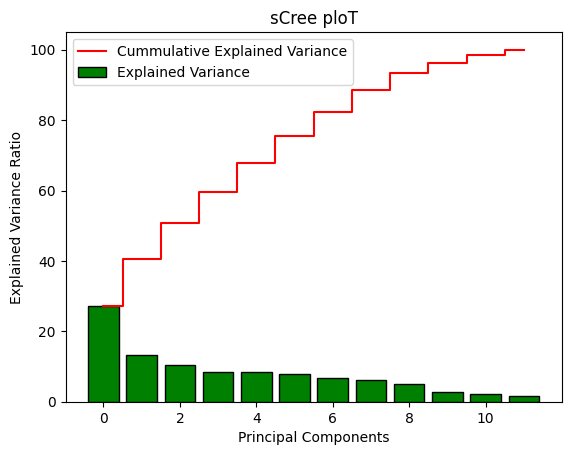

In [79]:
plt.bar(range(12),var_exp,align='center',color='green',edgecolor='black',label='Explained Variance')
plt.step(range(12),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('sCree ploT')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [126]:
pca = PCA(n_components=10)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PCA9','PCA10'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PCA9,PCA10
0,2.233554,-1.592359,0.352147,0.944928,-0.914016,0.174491,-1.071929,0.185196,-1.409861,0.099236
1,-1.556706,0.094229,1.040120,0.642446,-0.720071,-1.312904,-0.881877,0.637025,0.909007,0.041750
2,1.003421,0.982129,-0.600376,-0.596022,0.837841,-0.788198,-0.078720,0.190880,-0.594342,0.337233
3,-1.772056,-0.400594,-1.057984,-0.834319,0.667269,-0.304302,0.544530,-0.170939,0.034469,-0.258398
4,-0.214265,1.050641,0.169779,-0.359527,-0.469534,1.474104,1.469197,-0.692385,0.259745,-0.111576


In [65]:
label = pd.DataFrame(KMeans.labels_,columns=['Label'])


In [ ]:
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state = 100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [97]:
KMeans_df = pca_df.join(label)
KMeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PCA9,PCA10,Label
0,2.233554,-1.592359,0.352147,0.944928,-0.914016,0.174491,-1.071929,0.185196,-1.409861,0.099236,2
1,-1.556706,0.094229,1.040120,0.642446,-0.720071,-1.312904,-0.881877,0.637025,0.909007,0.041750,0
2,1.003421,0.982129,-0.600376,-0.596022,0.837841,-0.788198,-0.078720,0.190880,-0.594342,0.337233,1
3,-1.772056,-0.400594,-1.057984,-0.834319,0.667269,-0.304302,0.544530,-0.170939,0.034469,-0.258398,0
4,-0.214265,1.050641,0.169779,-0.359527,-0.469534,1.474104,1.469197,-0.692385,0.259745,-0.111576,1


In [141]:
KMeans_df['Label'].value_counts()

Label
0    1123
1     807
2     310
Name: count, dtype: int64

In [ ]:
sns.scatterplot(KMeans_df['PC1'],KMeans_df['PC2'],hue='Label',data=KMeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

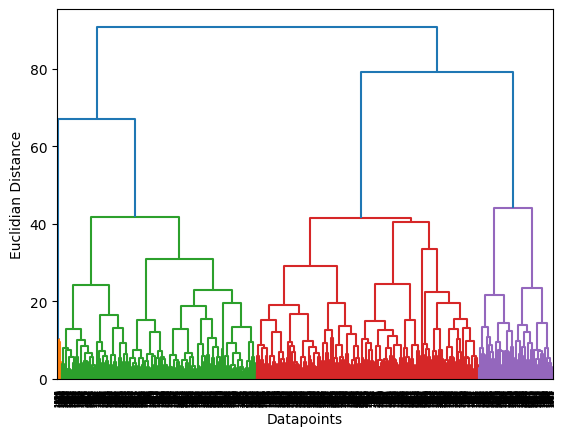

In [137]:
plt.Figure(figsize=[30,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidian Distance')
plt.show()

In [69]:
from sklearn.metrics import silhouette_score

In [103]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))
    

2 0.15078106827300614
3 0.1723184144255143
4 0.1790324173694589
5 0.18463230104750633
6 0.1370086949680763
7 0.12358005260087768
8 0.14062691028873714
9 0.1407367212577726
10 0.12300322511620289
11 0.12389872491452188
12 0.12323900637583761
13 0.12023874019166235
14 0.12057060619075242
15 0.11672957545298357
16 0.12024776811521173
17 0.11822106280970068
18 0.11941951816469672
19 0.11770441771722874


In [110]:
hie_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)


In [113]:
df_label1 = pd.DataFrame(hier_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,0
2,2
3,0
4,2


In [114]:
df_hier = df.join(df_label1)
df_hier.head()


,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,2,0,58138.0,58,7,0,1,1023,25,0,1,66,1
1,2,0,46344.0,38,5,0,0,15,6,2,0,69,0
2,2,1,71613.0,26,4,0,0,511,21,0,0,58,2
3,2,1,26646.0,26,6,0,0,47,8,1,0,39,0
4,4,1,58293.0,94,5,0,0,222,19,1,0,42,2


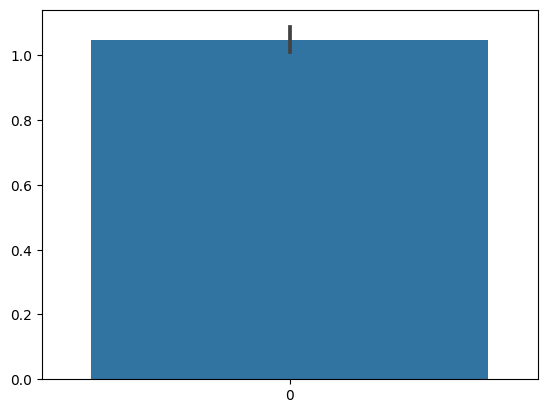

In [107]:
sns.barplot(df_hier['Labels']),df_hier['Total_Expenses']
plt.show()

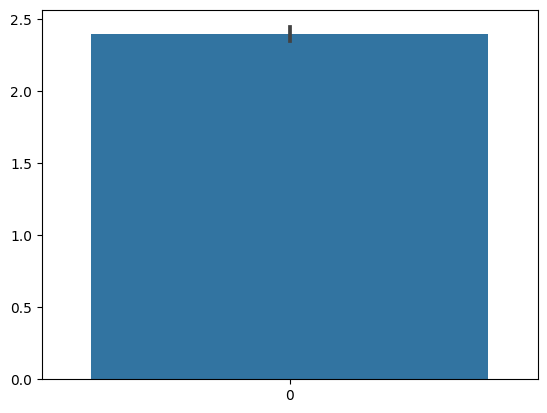

In [138]:
sns.barplot(df_hier['Education']),df_hier['Income']
plt.show()

In [ ]:
sns.countplot(df_hier['Marital_Status'],hue='Labels', data=df_hier)
plt.show()

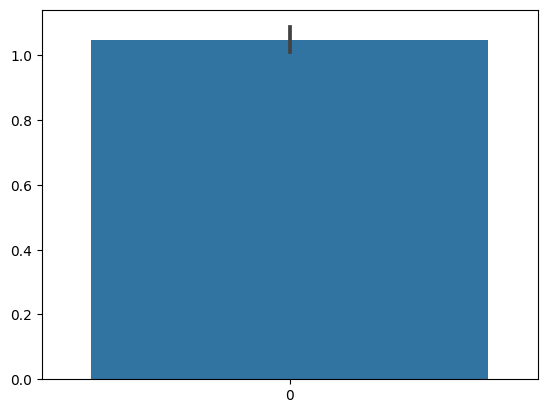

In [119]:
sns.barplot(df_hier['Labels']),df_hier['Num_Total_Purchases']
plt.show()

### Visualization and Interpretation of results

-----
## Happy Learning
-----